# Microsoft Movie Analysis

**Author:** Laura Miller
***

## Data Understanding
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
%matplotlib inline

In [2]:
csv_files = glob("./data/zippedData/*.csv.gz")
csv_files

['./data/zippedData/imdb.title.crew.csv.gz',
 './data/zippedData/tmdb.movies.csv.gz',
 './data/zippedData/imdb.title.akas.csv.gz',
 './data/zippedData/imdb.title.ratings.csv.gz',
 './data/zippedData/imdb.name.basics.csv.gz',
 './data/zippedData/imdb.title.basics.csv.gz',
 './data/zippedData/tn.movie_budgets.csv.gz',
 './data/zippedData/bom.movie_gross.csv.gz',
 './data/zippedData/imdb.title.principals.csv.gz']

In [3]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [4]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

### Movies (TMDB)

In [5]:
movies_df = csv_files_dict['tmdb_movies_gz']
type(movies_df)

pandas.core.frame.DataFrame

In [6]:
movies_df.shape

(26517, 9)

In [7]:
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


Contains TMDB rating and popularity info along with other details for various movies.

Observations: Everything looks to be formatted well except for release_date, which should be cast to date-time.
Would be interesting to use popularity or rating info as a heatmap.

### Title AKAs (IMDB)

In [9]:
title_akas_df = csv_files_dict['imdb_title_akas_gz']
type(movies_df)

pandas.core.frame.DataFrame

In [10]:
title_akas_df.shape

(331703, 7)

In [11]:
title_akas_df.head()

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [12]:
title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


Shows alternative titles and the regions associated for those titles. If an aka is original title, it is marked accordingly in is_original_title

Observations: lots of missing values, but dtypes look correct

### Title Basics (IMBD)

In [13]:
title_basics_df = csv_files_dict['imdb_title_basics_gz']
type(title_basics_df)

pandas.core.frame.DataFrame

In [14]:
title_basics_df.shape

(146144, 5)

In [15]:
title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


title_basics_df contains basic information about various movie titles from IMDB. "tconst" is an alphanumeric unique identifier for titles in IMDB's datasets. Descriptions for all columns in IMDB datasets can be found here: https://www.imdb.com/interfaces/. 

Observations: 
- Some missing values for original_title (not much of a problem), runtime_minutes, and genres.
- genres is a string array, with "," separation

Questions: 
- Any relationship between runtime and performance at the box office? 
- Any relationship between genre and performance (are some genres more popular)? 

### Title Ratings (IMDB)

In [17]:
title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
type(title_ratings_df)

pandas.core.frame.DataFrame

In [18]:
title_ratings_df.shape

(73856, 2)

In [19]:
title_ratings_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [20]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


From IMDB. This dataset contains IMDB ratings (weighted average of individual user ratings) and the number of votes for each title, identified by "tconst".

Observations: dataset looks rather complete. Some titles have way more votes, affecting the reliability of "averagerating".

Questions: Are IMDB ratings correlated with box office performance? What about the number of individual votes? More people may be likely to review more popular (high-grossing) films, regardless of what rating they submit. 

### Title Crew (IMDB)

In [21]:
title_crew_df = csv_files_dict['imdb_title_crew_gz']
type(title_crew_df)

pandas.core.frame.DataFrame

In [22]:
title_crew_df.shape

(146144, 2)

In [23]:
title_crew_df.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [24]:
title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


From IMDB. Shows directors and writers associated with each title. Some missing values for directors and/or writers for some titles.

Observations: 
- Directors and writers are denoted by nconsts (alphanumeric unique identifier for a name/person). I would need another dataset to find the names associated with each ncost.
- directors and writers columns contain string arrays

Questions: Should Microsoft consider working with some directors/writers over others?

### Title Principals (IMDB)

In [25]:
title_principals_df = csv_files_dict['imdb_title_principals_gz']
type(title_principals_df)

pandas.core.frame.DataFrame

In [26]:
title_principals_df.shape

(1028186, 5)

In [27]:
title_principals_df.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [28]:
title_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


### Name Basics (IMDB)

In [29]:
name_basics_df = csv_files_dict['imdb_name_basics_gz']
type(name_basics_df)

pandas.core.frame.DataFrame

In [30]:
name_basics_df.shape

(606648, 5)

In [31]:
name_basics_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [32]:
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


From IMDB. Shows basic info for people in the business, ordered by nconst.

We can use this to look up the name (and other background info) of a director or writer who works on a high-performing film

Observations: 
- Some missing values. I know I won't be interested in people who have died (those who have a non-null entry for death_year.
- more string arrays. May nor may not need to deal with these

### Movie Gross (BOM)

In [33]:
movie_gross_df = csv_files_dict['bom_movie_gross_gz']
type(movie_gross_df)

pandas.core.frame.DataFrame

In [34]:
movie_gross_df.shape

(3387, 4)

In [35]:
movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [36]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


From Box Office Mojo. This dataset shoes foreign and domestic gross information for different titles.

Observations: 
- foreign_gross datatype is object while domestic_gross is type float. Change foreign_gross to type float or int.
- movie_gross_df also contains studio information, which could also be a predictor for movie success.

### Movie Budgets (The Numbers)

In [37]:
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
type(movie_budgets_df)

pandas.core.frame.DataFrame

In [38]:
movie_budgets_df.shape

(5782, 5)

In [39]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


From The Numbers.

Observations: 
- release_date is dtype object. Possibly convert to date-time format. 
- Gross figures are also objects, and should be converted to type int or float

## Question 1: How much money should you spend to make a successful movie? 
***

### Clean Data

Clean data and create new variables to enhance analysis. Should adjust for inflation in order to work with the monetary data.

#### Check for duplicates

In [41]:
movie_budgets_df.duplicated().value_counts()

False    5782
dtype: int64

No duplicate entries

#### Check null values and most common values

In [42]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

No missing values in any columns

In [43]:
for col in movie_budgets_df:
    print(col)
    print(movie_budgets_df[col].value_counts(normalize=True))
    print("=======================================================")

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2009    0.002248
                  ...   
Dec 31, 1996    0.000173
Apr 12, 2019    0.000173
Dec 14, 1957    0.000173
Apr 7, 2004     0.000173
Dec 17, 2008    0.000173
Name: release_date, Length: 2418, dtype: float64
movie
Home                    0.000519
Halloween               0.000519
King Kong               0.000519
The Ten Commandments    0.000346
RoboCop                 0.000346
                          ...   
Heartbreakers           0.000173
The Kingdom             0.000173
One True Thing          0.000173
Jumper                  0.000173
O Menino e o Mundo      0.000173
Name: movie, Length: 5698, dtype: float64
production_budget
$20,000,000     0.039952
$10,000,000     0.036666
$30,000,000     0.030612
$15,000,000     0.029920
$25,000,000     0.029575
                  ...   
$6,750,000      0.000173
$111,000,000    0.000173
$10,750,000     0.000173
$210,000 

9.4% of movies have no domestic_gross, 6.3% of movies have no worldwide_gross. This data is either missing or the movies were never released

#### Change dtypes and reformat monetary data

In [44]:
# function for changing money columns to int types
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype(int)
    return df

In [45]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [46]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [47]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [48]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


#### Account for inflation

We are adjusting for inflation because we are dealing with historical monetary data.

In [49]:
import cpi

In [50]:
cpi.update()

In [51]:
movie_budgets_df['release_year'] = movie_budgets_df['release_date'].dt.year
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [52]:
movie_budgets_df.reset_index(inplace=True)

In [53]:
budgets_to_2018 = movie_budgets_df[movie_budgets_df['release_year'] < 2019].copy()

In [54]:
budgets_to_2018['budget_adjusted'] = budgets_to_2018.apply(lambda x: cpi.inflate(x.production_budget, x.release_year), axis=1)
budgets_to_2018['dgross_adjusted'] = budgets_to_2018.apply(lambda x: cpi.inflate(x.domestic_gross, x.release_year), axis=1)
budgets_to_2018['wwgross_adjusted'] = budgets_to_2018.apply(lambda x: cpi.inflate(x.worldwide_gross, x.release_year), axis=1)

In [55]:
#movie_budgets_df['budget_adjusted'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.production_budget, x.release_year), axis=1)
#movie_budgets_df['dgross_adjusted'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.domestic_gross, x.release_year), axis=1)
#movie_budgets_df['wwgross_adjusted'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.worldwide_gross, x.release_year), axis=1)

In [56]:
budgets_after_2018 = movie_budgets_df[movie_budgets_df['release_year'] <= 2019].copy()

In [57]:
budgets_after_2018['budget_adjusted'] = budgets_after_2018['production_budget']
budgets_after_2018['dgross_adjusted'] = budgets_after_2018['domestic_gross']
budgets_after_2018['wwgross_adjusted'] = budgets_after_2018['worldwide_gross']

In [58]:
movie_budgets_df = pd.concat([budgets_to_2018, budgets_after_2018], axis=0)

### EDA

#### Calculate ROI

In [59]:
movie_budgets_df['roi'] = (movie_budgets_df['wwgross_adjusted'] - movie_budgets_df['budget_adjusted']) / movie_budgets_df['budget_adjusted']
movie_budgets_df['domestic_roi'] = (movie_budgets_df['dgross_adjusted'] - movie_budgets_df['budget_adjusted']) / movie_budgets_df['budget_adjusted']

In [60]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,budget_adjusted,dgross_adjusted,wwgross_adjusted,roi,domestic_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,5.127072e+08,9.174536e+08,3.349300e+09,5.532577,0.789430
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,4.724294e+08,2.773640e+08,1.203123e+09,1.546673,-0.412899
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,3.609991e+08,5.012120e+08,1.532023e+09,3.243841,0.388403
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3.347058e+08,6.548212e+08,1.390266e+09,3.153696,0.956408
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,3.341371e+08,1.022789e+09,2.242116e+09,5.710167,2.060988


In [61]:
movie_budgets_df.shape

(11491, 12)

In [62]:
movie_budgets_df = movie_budgets_df.sort_values(by='roi', ascending=False)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,budget_adjusted,dgross_adjusted,wwgross_adjusted,roi,domestic_roi
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,1972,25000.000000,4.500000e+07,4.500000e+07,1799.000000,1799.000000
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,1972,154791.267943,2.786243e+08,2.786243e+08,1799.000000,1799.000000
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,1980,200000.000000,8.750000e+06,9.975000e+07,497.750000,42.750000
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,1980,628182.038835,2.748296e+07,3.133058e+08,497.750000,42.750000
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,2009,542866.498553,1.301900e+08,2.342566e+08,430.517853,238.819578


In [63]:
movie_budgets_df.reset_index(inplace=True)

In [64]:
budgets_adjusted_df = movie_budgets_df.drop(['production_budget', 'domestic_gross', 'worldwide_gross', 'id'], axis=1)
budgets_adjusted_df.head()

,index,release_date,movie,release_year,budget_adjusted,dgross_adjusted,wwgross_adjusted,roi,domestic_roi
0,5745,1972-06-30,Deep Throat,1972,25000.000000,4.500000e+07,4.500000e+07,1799.000000,1799.000000
1,5745,1972-06-30,Deep Throat,1972,154791.267943,2.786243e+08,2.786243e+08,1799.000000,1799.000000
2,5613,1980-03-21,Mad Max,1980,200000.000000,8.750000e+06,9.975000e+07,497.750000,42.750000
3,5613,1980-03-21,Mad Max,1980,628182.038835,2.748296e+07,3.133058e+08,497.750000,42.750000
4,5492,2009-09-25,Paranormal Activity,2009,542866.498553,1.301900e+08,2.342566e+08,430.517853,238.819578


In [65]:
budgets_adjusted_df.isna().sum()

index               0
release_date        0
movie               0
release_year        0
budget_adjusted     0
dgross_adjusted     0
wwgross_adjusted    0
roi                 0
domestic_roi        0
dtype: int64

No duplicates in inflation-adjusted dataframe

#### Create budget classes

In [66]:
budgets_adjusted_df['budget_adjusted'].describe()

count    1.149100e+04
mean     3.699914e+07
std      4.700373e+07
min      1.100000e+03
25%      6.000000e+06
50%      2.000000e+07
75%      4.838919e+07
max      5.127072e+08
Name: budget_adjusted, dtype: float64

Distribution of budgets is right_skewed

In [67]:
budgets_adjusted_df['budget_range'] = pd.qcut(budgets_adjusted_df['budget_adjusted'], q=4, precision=0)
budgets_adjusted_df.head()

,index,release_date,movie,release_year,budget_adjusted,dgross_adjusted,wwgross_adjusted,roi,domestic_roi,budget_range
0,5745,1972-06-30,Deep Throat,1972,25000.000000,4.500000e+07,4.500000e+07,1799.000000,1799.000000,"(1099.0, 6000000.0]"
1,5745,1972-06-30,Deep Throat,1972,154791.267943,2.786243e+08,2.786243e+08,1799.000000,1799.000000,"(1099.0, 6000000.0]"
2,5613,1980-03-21,Mad Max,1980,200000.000000,8.750000e+06,9.975000e+07,497.750000,42.750000,"(1099.0, 6000000.0]"
3,5613,1980-03-21,Mad Max,1980,628182.038835,2.748296e+07,3.133058e+08,497.750000,42.750000,"(1099.0, 6000000.0]"
4,5492,2009-09-25,Paranormal Activity,2009,542866.498553,1.301900e+08,2.342566e+08,430.517853,238.819578,"(1099.0, 6000000.0]"


In [68]:
budgets_adjusted_df['budget_range'].value_counts()

(1099.0, 6000000.0]          2924
(6000000.0, 20000000.0]      2881
(48389193.0, 512707249.0]    2873
(20000000.0, 48389193.0]     2813
Name: budget_range, dtype: int64

We have roughly the same number of entries in each bin

- Low Budget: 1,000 - 7,800,000
- Low Medium Budget: 7.8 - 24 million
- High Medium Budget: 24 - 58 million
- High Budget: 58 million + (up to 513 million)

In [69]:
bin_labels = ['Low', 'Low Medium', 'High Medium', 'High']

budgets_adjusted_df['budget_class'] = pd.qcut(budgets_adjusted_df['budget_adjusted'], q=[0, 0.25, 0.5, 0.75, 1], labels=bin_labels, precision=0)
budgets_adjusted_df.head()

,index,release_date,movie,release_year,budget_adjusted,dgross_adjusted,wwgross_adjusted,roi,domestic_roi,budget_range,budget_class
0,5745,1972-06-30,Deep Throat,1972,25000.000000,4.500000e+07,4.500000e+07,1799.000000,1799.000000,"(1099.0, 6000000.0]",Low
1,5745,1972-06-30,Deep Throat,1972,154791.267943,2.786243e+08,2.786243e+08,1799.000000,1799.000000,"(1099.0, 6000000.0]",Low
2,5613,1980-03-21,Mad Max,1980,200000.000000,8.750000e+06,9.975000e+07,497.750000,42.750000,"(1099.0, 6000000.0]",Low
3,5613,1980-03-21,Mad Max,1980,628182.038835,2.748296e+07,3.133058e+08,497.750000,42.750000,"(1099.0, 6000000.0]",Low
4,5492,2009-09-25,Paranormal Activity,2009,542866.498553,1.301900e+08,2.342566e+08,430.517853,238.819578,"(1099.0, 6000000.0]",Low


#### Add profit column(s)
Calculating budget-gross difference

In [70]:
budgets_adjusted_df['budget_gross_diff'] = budgets_adjusted_df['wwgross_adjusted'] - budgets_adjusted_df['budget_adjusted']
budgets_adjusted_df['domestic_profit'] = budgets_adjusted_df['dgross_adjusted'] - budgets_adjusted_df['budget_adjusted']

In [71]:
budgets_adjusted_df.rename(columns = {'budget_adjusted':'budget', 'dgross_adjusted':'domestic_gross', 'wwgross_adjusted':'worldwide_gross', 'budget_gross_diff':'profit'}, inplace = True)

In [72]:
budgets_adjusted_df.head()

,index,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
0,5745,1972-06-30,Deep Throat,1972,25000.000000,4.500000e+07,4.500000e+07,1799.000000,1799.000000,"(1099.0, 6000000.0]",Low,4.497500e+07,4.497500e+07
1,5745,1972-06-30,Deep Throat,1972,154791.267943,2.786243e+08,2.786243e+08,1799.000000,1799.000000,"(1099.0, 6000000.0]",Low,2.784695e+08,2.784695e+08
2,5613,1980-03-21,Mad Max,1980,200000.000000,8.750000e+06,9.975000e+07,497.750000,42.750000,"(1099.0, 6000000.0]",Low,9.955000e+07,8.550000e+06
3,5613,1980-03-21,Mad Max,1980,628182.038835,2.748296e+07,3.133058e+08,497.750000,42.750000,"(1099.0, 6000000.0]",Low,3.126776e+08,2.685478e+07
4,5492,2009-09-25,Paranormal Activity,2009,542866.498553,1.301900e+08,2.342566e+08,430.517853,238.819578,"(1099.0, 6000000.0]",Low,2.337137e+08,1.296471e+08


#### Preliminary Visualization

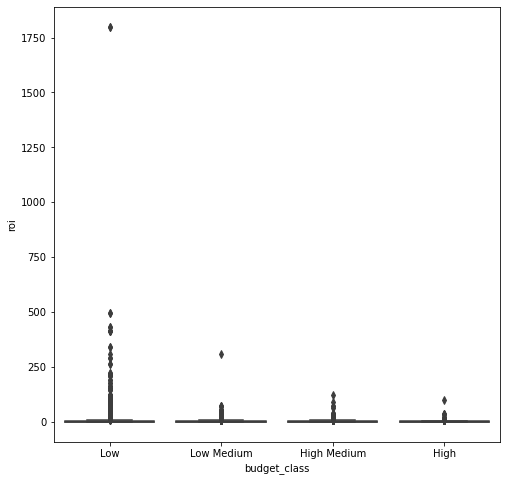

In [73]:
plt.figure(figsize=(8,8))
sns.boxplot(x='budget_class', y='roi', data=budgets_adjusted_df);

Lots of outliers per budget class for ROI. The Low budget class contains the most outliers

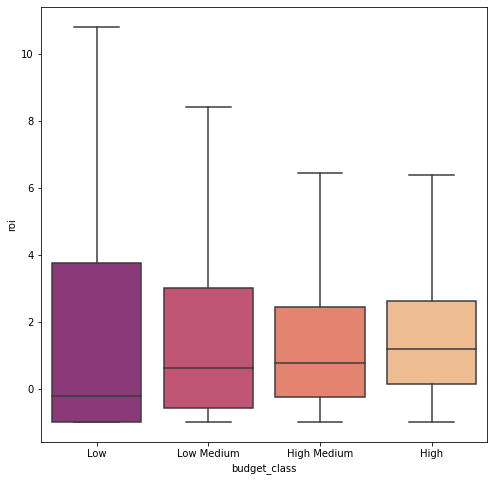

In [74]:
plt.figure(figsize=(8,8))
clrs = ['#982d80', '#d3436e', '#f8765c', '#febb81']
sns.boxplot(x='budget_class', y='roi', data=budgets_adjusted_df, showfliers=False, palette=clrs);

Same plot without outliers

### Inspect and address outliers

Inspecting ROI outliers first. Calculations use the IQR method.

In [75]:
budgets_adjusted_df = budgets_adjusted_df.sort_values(by='roi', ascending=True)

Q1 = np.quantile(budgets_adjusted_df['roi'],0.25)
Q3 = np.quantile(budgets_adjusted_df['roi'],0.75)
IQR = Q3 - Q1 
IQR

3.2653807091919194

In [76]:
lower_lim = Q1 - (1.5*IQR)
upper_lim = Q3 + (1.5*IQR)

In [77]:
outliers_low = (budgets_adjusted_df['roi'] < lower_lim)
outliers_high = (budgets_adjusted_df['roi'] > upper_lim)
outlier_df = budgets_adjusted_df[outliers_low | outliers_high]
outlier_df.head()

,index,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
983,1344,1999-05-28,Notting Hill,1999,4.200000e+07,1.160897e+08,3.637281e+08,7.660192,1.764040,"(20000000.0, 48389193.0]",High Medium,3.217281e+08,7.408968e+07
984,1344,1999-05-28,Notting Hill,1999,6.524647e+07,1.803439e+08,5.650470e+08,7.660192,1.764040,"(48389193.0, 512707249.0]",High,4.998005e+08,1.150974e+08
982,4781,1959-03-29,Some Like it Hot,1959,2.564851e+07,2.223462e+08,2.225200e+08,7.675749,7.668973,"(20000000.0, 48389193.0]",High Medium,1.968715e+08,1.966977e+08
981,4781,1959-03-29,Some Like it Hot,1959,2.883848e+06,2.500000e+07,2.501954e+07,7.675749,7.668973,"(1099.0, 6000000.0]",Low,2.213569e+07,2.211615e+07
980,631,2006-03-31,Ice Age: The Meltdown,2006,9.628385e+07,2.507625e+08,8.368983e+08,7.691990,1.604408,"(48389193.0, 512707249.0]",High,7.406145e+08,1.544786e+08


In [78]:
outlier_df['budget_class'].value_counts(normalize=True)

Low            0.487310
Low Medium     0.269036
High Medium    0.153299
High           0.090355
Name: budget_class, dtype: float64

In [79]:
no_roi_outliers = budgets_adjusted_df[~(outliers_low | outliers_high)]

Most of the outliers for ROI happen to be Low and Low-Medium budget films (1000-7,800,000 and 7,800,000-24,000,000 respectively). I saw this in my preliminary boxplot. Now to examine profit outliers:

In [80]:
budgets_adjusted_df = budgets_adjusted_df.sort_values(by='profit', ascending=True)

Q1 = np.quantile(budgets_adjusted_df['profit'],0.25)
Q3 = np.quantile(budgets_adjusted_df['profit'],0.75)
IQR = Q3 - Q1 

lower_lim = Q1 - (1.5*IQR)
upper_lim = Q3 + (1.5*IQR)

outliers_low = (budgets_adjusted_df['profit'] < lower_lim)
outliers_high = (budgets_adjusted_df['profit'] > upper_lim)
profit_outlier_df = budgets_adjusted_df[outliers_low | outliers_high]
profit_outlier_df.head()

,index,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
8803,2,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08
10943,2327,1970-01-01,Waterloo,1970,1.667597e+08,0.000000e+00,0.000000e+00,-1.000000,-1.000000,"(48389193.0, 512707249.0]",High,-1.667597e+08,-1.667597e+08
9887,352,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08
10025,404,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08
9974,1333,1980-11-19,Heaven's Gate,1980,1.382000e+08,1.094397e+07,1.094457e+07,-0.920806,-0.920811,"(48389193.0, 512707249.0]",High,-1.272555e+08,-1.272561e+08


In [81]:
profit_outlier_df.sort_values(by='profit', ascending=False)

,index,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
57,4567,1939-12-15,Gone with the Wind,1939,7.261604e+07,3.699330e+09,7.271382e+09,99.134665,49.943710,"(48389193.0, 512707249.0]",High,7.198766e+09,3.626714e+09
12,5346,1942-08-13,Bambi,1942,1.362330e+07,1.632208e+09,4.255297e+09,311.354312,118.810023,"(6000000.0, 20000000.0]",Low Medium,4.241674e+09,1.618585e+09
78,3464,1977-05-25,Star Wars Ep. IV: A New Hope,1977,4.697889e+07,1.968834e+09,3.359410e+09,70.508910,40.908910,"(20000000.0, 48389193.0]",High Medium,3.312431e+09,1.921855e+09
36,5117,1937-12-21,Snow White and the Seven Dwarfs,1937,2.674380e+07,3.323663e+09,3.323663e+09,123.277880,123.277880,"(20000000.0, 48389193.0]",High Medium,3.296919e+09,3.296919e+09
702,42,1997-12-19,Titanic,1997,3.225059e+08,1.063244e+09,3.560801e+09,10.041042,2.296820,"(48389193.0, 512707249.0]",High,3.238295e+09,7.407380e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,1333,1980-11-19,Heaven's Gate,1980,1.382000e+08,1.094397e+07,1.094457e+07,-0.920806,-0.920811,"(48389193.0, 512707249.0]",High,-1.272555e+08,-1.272561e+08
10025,404,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08
9887,352,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08
10943,2327,1970-01-01,Waterloo,1970,1.667597e+08,0.000000e+00,0.000000e+00,-1.000000,-1.000000,"(48389193.0, 512707249.0]",High,-1.667597e+08,-1.667597e+08


In [82]:
profit_outlier_df['budget_class'].value_counts(normalize=True)

High           0.725037
High Medium    0.173621
Low Medium     0.077496
Low            0.023845
Name: budget_class, dtype: float64

In [83]:
profit_outlier_df.groupby('budget_class').mean()

,index,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,profit,domestic_profit
budget_class,,,,,,,,,
Low,4943.750000,1984.437500,3.425048e+06,1.833037e+08,3.270556e+08,209.756112,132.631138,3.236306e+08,1.798786e+08
Low Medium,3461.980769,1995.394231,1.425764e+07,1.832396e+08,3.703483e+08,27.442540,13.224603,3.560907e+08,1.689820e+08
High Medium,2399.309013,1996.476395,3.457087e+07,2.461760e+08,4.469761e+08,12.444151,6.441327,4.124052e+08,2.116051e+08
High,610.759507,2005.421377,1.320084e+08,2.474337e+08,6.205105e+08,4.282092,1.219803,4.885021e+08,1.154252e+08


In [84]:
profit_outlier_df.groupby('budget_class').std()

,index,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,profit,domestic_profit
budget_class,,,,,,,,,
Low,579.299967,27.626469,2.011151e+06,1.546607e+08,1.796733e+08,322.751215,312.791584,1.792134e+08,1.543330e+08
Low Medium,753.992828,17.157420,4.121518e+06,1.789110e+08,4.034298e+08,30.976690,14.432035,4.035080e+08,1.791561e+08
High Medium,956.914599,16.769497,7.612963e+06,3.088870e+08,4.105341e+08,12.915339,10.045939,4.100790e+08,3.087476e+08
High,726.940829,11.782635,6.466245e+07,1.899445e+08,4.207328e+08,4.461794,2.409619,3.973757e+08,1.860483e+08


Profit outliers disproportionately come from high budget films. The average budgets of these films don't seem to be on the higher ends of their respective categories. That is, it is not necessarily the extremely high budget films (budget outliers) that lead to outliers in profit.

In [85]:
no_profit_outliers = budgets_adjusted_df[~(outliers_low | outliers_high)]
no_profit_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 9397 to 753
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            10149 non-null  int64         
 1   release_date     10149 non-null  datetime64[ns]
 2   movie            10149 non-null  object        
 3   release_year     10149 non-null  int64         
 4   budget           10149 non-null  float64       
 5   domestic_gross   10149 non-null  float64       
 6   worldwide_gross  10149 non-null  float64       
 7   roi              10149 non-null  float64       
 8   domestic_roi     10149 non-null  float64       
 9   budget_range     10149 non-null  category      
 10  budget_class     10149 non-null  category      
 11  profit           10149 non-null  float64       
 12  domestic_profit  10149 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 971.7+ KB

### Visualization

In [86]:
from matplotlib import ticker

In [87]:
clrs = ['#f25022', '#7fba00', '#00a4ef', '#ffb900', '#737373']
sns.set_palette(clrs)

<Figure size 432x288 with 0 Axes>

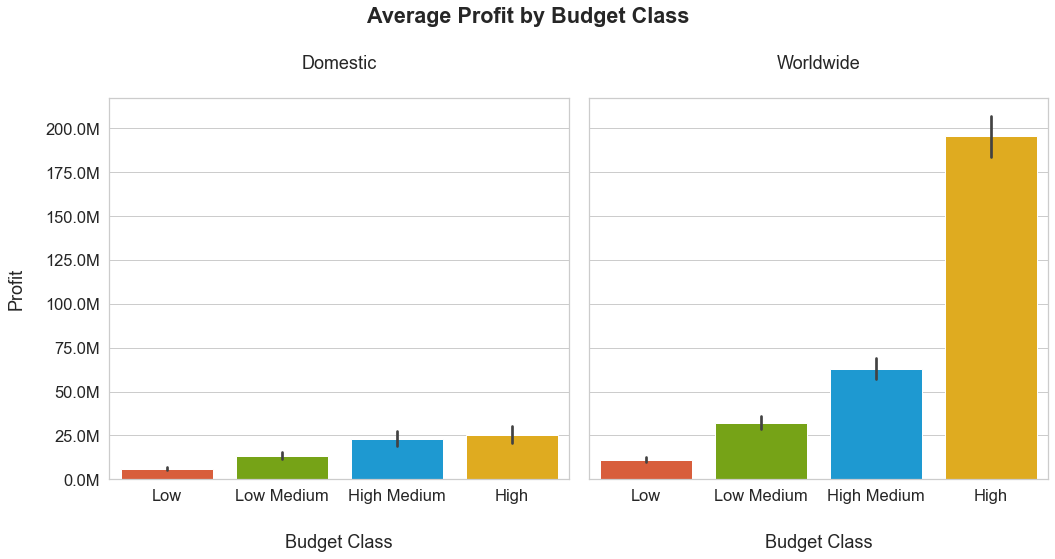

In [88]:
sns.set_theme(font_scale=1.5)
sns.set_style('whitegrid')
sns.despine()

fig,axes = plt.subplots(1,2, figsize=(15,8), sharey=True)
fig.suptitle('Average Profit by Budget Class', fontweight='bold')

sns.barplot(x='budget_class', y='domestic_profit', data=budgets_adjusted_df, palette=clrs, ax=axes[0])
axes[0].set_title('Domestic', pad=30)
axes[0].set_xlabel('Budget Class', labelpad=30)
axes[0].set_ylabel('Profit', labelpad=20)
axes[0].yaxis.get_major_formatter().set_scientific(False)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))

sns.barplot(x='budget_class', y='profit', data=budgets_adjusted_df, palette=clrs, ax=axes[1])
axes[1].set_title('Worldwide', pad=30)
axes[1].set_xlabel('Budget Class', labelpad=30)
axes[1].set_ylabel('')
fig.tight_layout()
plt.savefig('Profit_BudgetClass', dpi=300);

High medium budget films (24-58 million) lead to greater profits domestically, while high budget films (58 million +) yield greater profits on average worldwide.

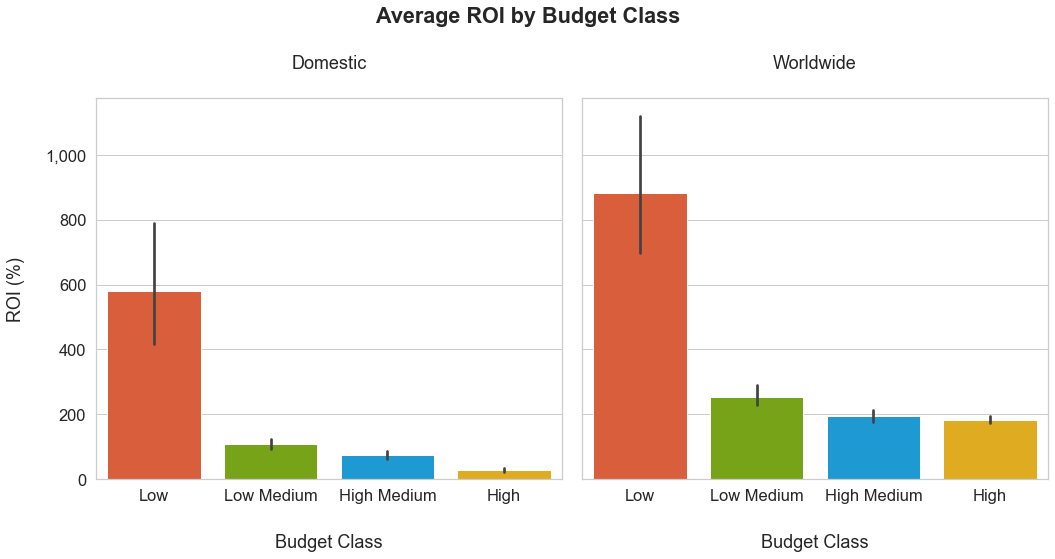

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Average ROI by Budget Class', fontweight='bold')

sns.barplot(x='budget_class', y='domestic_roi', data=budgets_adjusted_df, palette=clrs, ax=axes[0])
axes[0].set_title('Domestic', pad=30)
axes[0].set_xlabel('Budget Class', labelpad=30)
axes[0].set_ylabel('ROI (%)', labelpad=20)
axes[0].yaxis.get_major_formatter().set_scientific(False)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100)))


sns.barplot(x='budget_class', y='roi', data=budgets_adjusted_df, palette=clrs, ax=axes[1])
axes[1].set_title('Worldwide', pad=30)
axes[1].set_xlabel('Budget Class', labelpad=30)
axes[1].set_ylabel('')
fig.tight_layout()
plt.savefig('ROI_BudgetClass', dpi=300);

Low budget films (1,000 - 7,800,000) yield have the highest ROI on average. But we can see by the error bars that this data is quite spread out. In my preliminary visualization, we saw that low budget films have the most outliers and the greatest spread (which makes sense, given the small sizes of these budgets). A boxplot may be more useful.

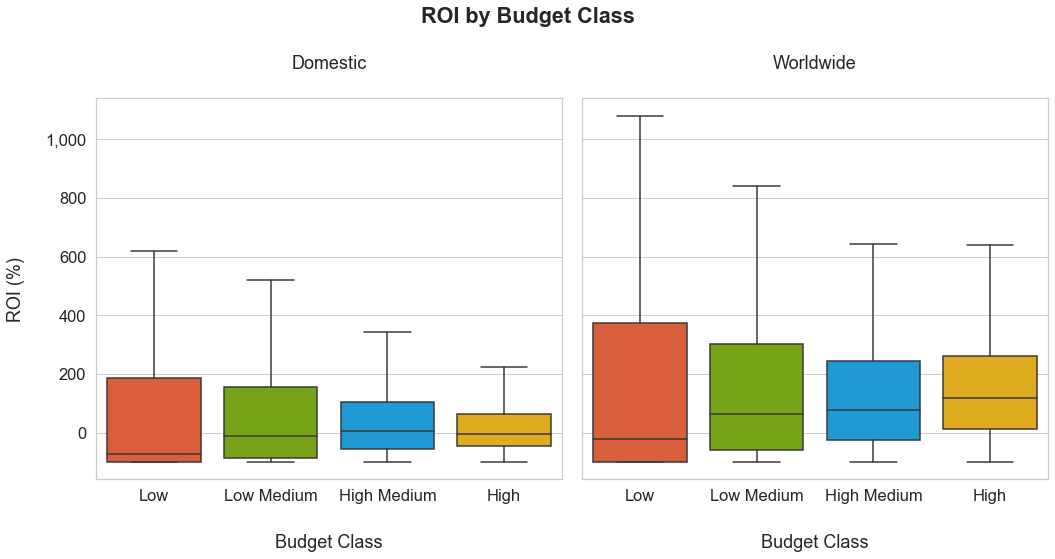

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('ROI by Budget Class', fontweight='bold')

sns.boxplot(x='budget_class', y='domestic_roi', data=budgets_adjusted_df, showfliers=False,
            palette=clrs, ax=axes[0])
axes[0].set_title('Domestic', pad=30)
axes[0].set_xlabel('Budget Class', labelpad=30)
axes[0].set_ylabel('ROI (%)', labelpad=20)
axes[0].yaxis.get_major_formatter().set_scientific(False)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100)))


sns.boxplot(x='budget_class', y='roi', data=budgets_adjusted_df, showfliers=False,
            palette=clrs, ax=axes[1])
axes[1].set_title('Worldwide', pad=30)
axes[1].set_xlabel('Budget Class', labelpad=30)
axes[1].set_ylabel('')
fig.tight_layout()
plt.savefig('ROI_BudgetClass_Boxplot', dpi=300);

At first glance, low budget films have the highest average return on investment, but the spread of the data is much larger. With outliers removed from the boxplots above, we see that the median domestic and worldwide ROI values are actually lower than those of the other budget categories. Meanwhile, there is a generally positive trend between budget size and profit. 
In general, there is potential to see higher ROIs from lower budget films, but this is not guaranteed. Higher budget films will make the most money on average. After taking these visualizations into consideration, the sweetspot for this seems to be the High Medium budget category (24-58 million), especially for domestic releases. For worldwide releases, Microsoft should consider spending upwards of 58 million if they want larger profits. Therefore, I recommend spending in the high medium range first, then high budget range in the future.

In [91]:
clrs

['#f25022', '#7fba00', '#00a4ef', '#ffb900', '#737373']

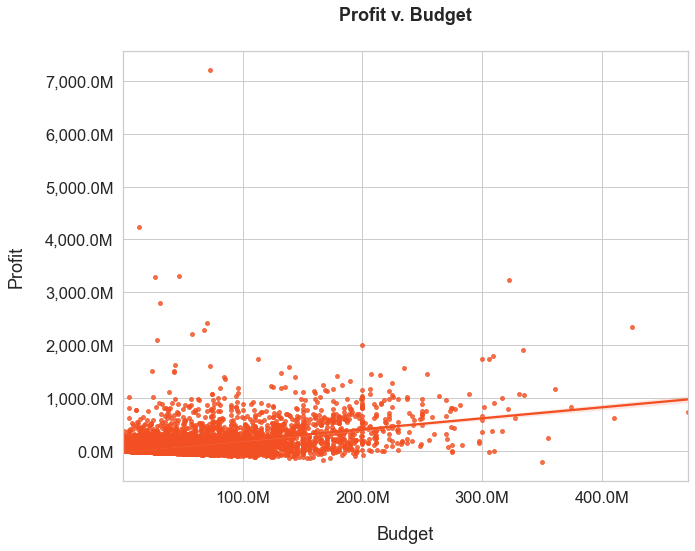

In [92]:
plt.figure(figsize=(10,8))
ax = sns.regplot(x='budget', y='profit', data=budgets_adjusted_df[budgets_adjusted_df['budget'] <= 500000001], 
                 color='#f25022' , scatter_kws={"s": 15})
plt.title('Profit v. Budget', fontweight='bold', pad=30)
plt.xlabel('Budget', labelpad=20)
plt.ylabel('Profit', labelpad=20)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))

ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig('Profit_Budget', dpi=300);

#### Other correlation plots, removing ROI and profit outliers

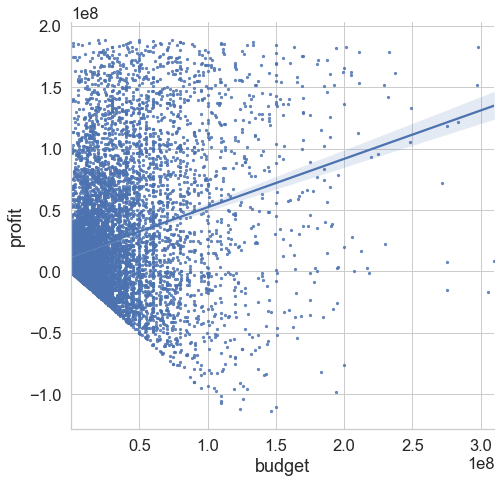

In [93]:
sns.lmplot(x='budget', y='profit', data=no_profit_outliers[:], scatter_kws={"s": 5}, height=7);

Scatter plot of all data. We can see that there are some budget outliers off to the right of the plot

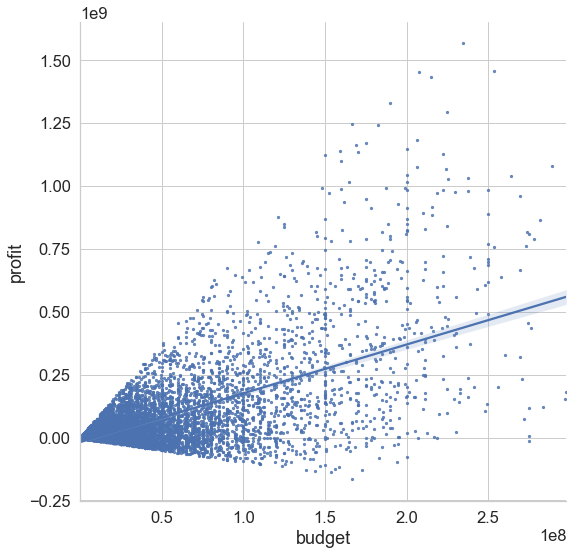

In [94]:
sns.lmplot(x='budget', y='profit', data=no_roi_outliers[no_roi_outliers['budget'] < 300000000], 
           scatter_kws={"s": 5}, height=8);

#### Bonus visualization
I'd like a scatterplot with rating as a colormap. Need to clean movies_df first.

In [95]:
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [96]:
movies_df.shape

(26517, 9)

In [97]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


There might be slightly different release dates between two dataframes, so let's join on release year instead

In [98]:
movies_df['release_year'] = movies_df['release_date'].dt.year

In [99]:
budgets_ratings_df = pd.merge(budgets_adjusted_df, movies_df, left_on=['movie', 'release_year'], 
                            right_on=['original_title', 'release_year'])

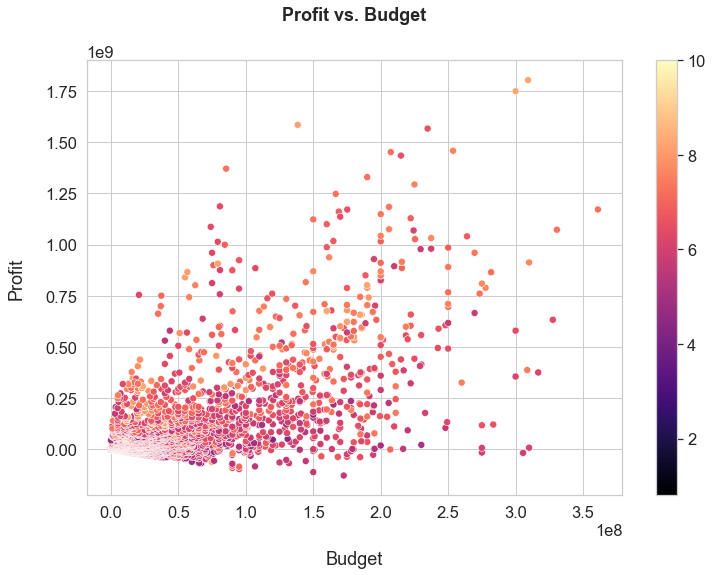

In [100]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='budget', y='profit', data=budgets_ratings_df[budgets_ratings_df['budget'] < 400000000], 
                     s=50, hue='vote_average', palette='magma')
plt.title('Profit vs. Budget', fontweight='bold', pad=40, fontsize=18)
plt.xlabel('Budget', labelpad=30)
plt.ylabel('Profit', labelpad=20)
norm = plt.Normalize(budgets_ratings_df['vote_average'].min(), budgets_ratings_df['vote_average'].max())
sm = plt.cm.ScalarMappable(cmap='magma', norm=norm)

ax.get_legend().remove()
ax.figure.colorbar(sm);

### Clean up budget dataframe for other analyses

I want to exclude the low budget category, which produces most of the ROI outliers, as well as films bade before 2010. I am keeping profit outliers

In [101]:
budgets_adjusted_df.head()

,index,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
8803,2,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08
10943,2327,1970-01-01,Waterloo,1970,1.667597e+08,0.000000e+00,0.000000e+00,-1.000000,-1.000000,"(48389193.0, 512707249.0]",High,-1.667597e+08,-1.667597e+08
9887,352,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08
10025,404,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08
9974,1333,1980-11-19,Heaven's Gate,1980,1.382000e+08,1.094397e+07,1.094457e+07,-0.920806,-0.920811,"(48389193.0, 512707249.0]",High,-1.272555e+08,-1.272561e+08


In [102]:
budgets_adjusted_df.shape

(11491, 13)

In [103]:
budgets_adjusted_df = budgets_adjusted_df.loc[~(budgets_adjusted_df['budget_class']=='Low')]
budgets_adjusted_df = budgets_adjusted_df[budgets_adjusted_df['release_year'] >= 2000]
budgets_adjusted_df.shape

(6410, 13)

In [104]:
budgets_adjusted_df.reset_index(inplace=True)
budgets_adjusted_df = budgets_adjusted_df.drop('index', axis=1)
budgets_adjusted_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
0,8803,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08
1,9887,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08
2,10025,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08
3,9276,2011-03-11,Mars Needs Moms,2011,1.725875e+08,2.461414e+07,4.550528e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.270822e+08,-1.479733e+08
4,9275,2011-03-11,Mars Needs Moms,2011,1.500000e+08,2.139276e+07,3.954976e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.104502e+08,-1.286072e+08


## Question 2: When to release a movie?
***

#### Get month name and month number

In [105]:
budgets_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   level_0          6410 non-null   int64         
 1   release_date     6410 non-null   datetime64[ns]
 2   movie            6410 non-null   object        
 3   release_year     6410 non-null   int64         
 4   budget           6410 non-null   float64       
 5   domestic_gross   6410 non-null   float64       
 6   worldwide_gross  6410 non-null   float64       
 7   roi              6410 non-null   float64       
 8   domestic_roi     6410 non-null   float64       
 9   budget_range     6410 non-null   category      
 10  budget_class     6410 non-null   category      
 11  profit           6410 non-null   float64       
 12  domestic_profit  6410 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 563.9+ KB


In [106]:
months_df = budgets_adjusted_df.copy()
months_df['month'] = months_df['release_date'].dt.month_name()
months_df['month_no'] = months_df['release_date'].dt.month

months_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit,month,month_no
0,8803,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08,June,6
1,9887,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08,April,4
2,10025,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08,August,8
3,9276,2011-03-11,Mars Needs Moms,2011,1.725875e+08,2.461414e+07,4.550528e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.270822e+08,-1.479733e+08,March,3
4,9275,2011-03-11,Mars Needs Moms,2011,1.500000e+08,2.139276e+07,3.954976e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.104502e+08,-1.286072e+08,March,3


In [107]:
months_grouped = months_df.groupby(['month_no', 'month']).mean()

In [108]:
months_grouped

,,level_0,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,profit,domestic_profit
month_no,month,,,,,,,,,
1,January,5424.262467,2009.687664,3.343733e+07,3.713698e+07,7.730724e+07,1.734188,0.450388,4.386991e+07,3.699643e+06
2,February,5536.170526,2009.160000,4.181815e+07,5.092696e+07,1.072284e+08,1.668786,0.408797,6.541026e+07,9.108812e+06
3,March,5690.527985,2008.916045,5.093658e+07,5.800538e+07,1.261046e+08,1.299152,0.223114,7.516801e+07,7.068807e+06
4,April,5947.662188,2008.589251,3.897530e+07,4.301098e+07,9.700815e+07,1.268824,0.212702,5.803285e+07,4.035682e+06
5,May,5207.913440,2009.234624,7.992699e+07,1.029342e+08,2.603477e+08,2.046394,0.288317,1.804207e+08,2.300724e+07
6,June,5166.907598,2009.069815,7.094094e+07,9.461683e+07,2.196052e+08,2.063257,0.484574,1.486642e+08,2.367589e+07
7,July,4880.371179,2008.958515,7.182923e+07,9.289714e+07,2.293545e+08,2.186993,0.454330,1.575253e+08,2.106791e+07
8,August,5650.644689,2008.597070,4.156193e+07,4.938651e+07,9.836658e+07,1.501281,0.330855,5.680465e+07,7.824579e+06
9,September,6095.869718,2008.855634,3.446636e+07,3.198859e+07,6.842437e+07,1.101147,0.048607,3.395802e+07,-2.477766e+06


In [109]:
months_grouped.reset_index(inplace=True)
months_grouped.head()

,month_no,month,level_0,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,profit,domestic_profit
0,1,January,5424.262467,2009.687664,3.343733e+07,3.713698e+07,7.730724e+07,1.734188,0.450388,4.386991e+07,3.699643e+06
1,2,February,5536.170526,2009.160000,4.181815e+07,5.092696e+07,1.072284e+08,1.668786,0.408797,6.541026e+07,9.108812e+06
2,3,March,5690.527985,2008.916045,5.093658e+07,5.800538e+07,1.261046e+08,1.299152,0.223114,7.516801e+07,7.068807e+06
3,4,April,5947.662188,2008.589251,3.897530e+07,4.301098e+07,9.700815e+07,1.268824,0.212702,5.803285e+07,4.035682e+06
4,5,May,5207.913440,2009.234624,7.992699e+07,1.029342e+08,2.603477e+08,2.046394,0.288317,1.804207e+08,2.300724e+07


### Visualization

In [110]:
clrs

['#f25022', '#7fba00', '#00a4ef', '#ffb900', '#737373']

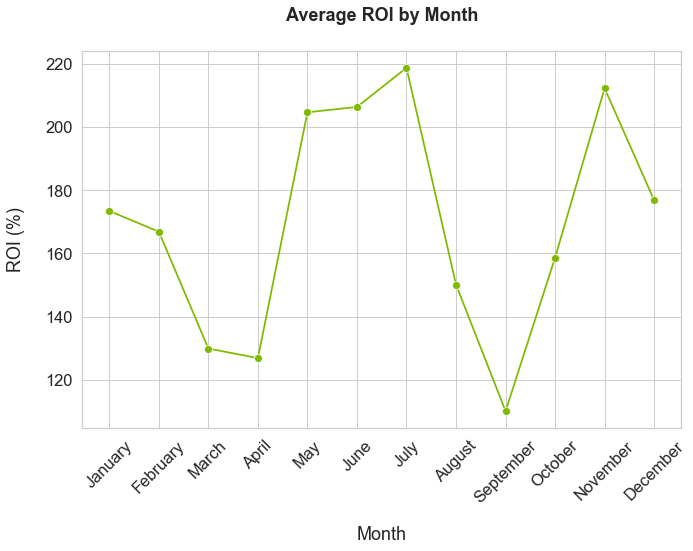

In [111]:
plt.figure(figsize=(10,8))

ax = sns.lineplot(x='month', y='roi', data=months_grouped, color='#7fba00', marker='o',
                 markersize=8, linewidth=1.75)
plt.title('Average ROI by Month', fontweight='bold', pad=30)
plt.xlabel('Month', labelpad=20)
plt.ylabel('ROI (%)', labelpad=20)
plt.xticks(rotation=45)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100)))
plt.tight_layout()
plt.savefig('ROI_Month', dpi=300);

Over the years, the best months for releasing a movie appear to be the summer months of May-June (with peak profits in May) as well as November-December

## Question 3: What genres have the highest ROI?

### Clean data

In [112]:
title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [113]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [114]:
for col in title_basics_df:
    print(col)
    print(title_basics_df[col].value_counts(normalize=True))
    print("=======================================================")

primary_title
Home                                              0.000164
Broken                                            0.000137
The Return                                        0.000137
Homecoming                                        0.000109
Alone                                             0.000109
                                                    ...   
The Invisible Friend                              0.000007
BuzzKill                                          0.000007
Skapandet av Shadowgames                          0.000007
Killing the Messenger: The Deadly Cost of News    0.000007
The Taste of Betel Nut                            0.000007
Name: primary_title, Length: 136071, dtype: float64
original_title
Broken                                     0.000130
Home                                       0.000123
The Return                                 0.000116
Homecoming                                 0.000089
Freedom                                    0.000089
          

2115 must be a placeholder value for missing start year data.

#### Check for and inspect duplicates

In [115]:
title_basics_df.duplicated().value_counts()

False    146022
True        122
dtype: int64

In [116]:
title_basics_df[title_basics_df.duplicated(keep=False)].sort_values(by='primary_title')

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
tt9660588,3. Elma,3. Elma,2014,65.0,Drama
tt9653930,3. Elma,3. Elma,2014,65.0,Drama
tt9773302,3. Elma,3. Elma,2014,65.0,Drama
...,...,...,...,...,...
tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


Duplicate titles seem to have different tconst values. Keep all entries for now, as we may need options for tconst values as we merge this dataframe with others

In [117]:
title_basics_df['start_year'] = title_basics_df['start_year'].astype(int)
title_basics_df.reset_index(inplace=True)

### EDA

#### Merge title basics with movie budgets
Connect genre info to monetary info for films with highest roi

In [118]:
# Sort by most profitable movies
sorted_df = budgets_adjusted_df.sort_values(by='roi', ascending=False)
top100_df = sorted_df[:100]
top100_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
6149,75,2002-04-19,My Big Fat Greek Wedding,2002,7.193191e+06,3.473422e+08,5.393311e+08,73.978007,47.287642,"(6000000.0, 20000000.0]",Low Medium,5.321379e+08,3.401490e+08
6101,130,2012-05-25,Les Intouchables,2012,1.080000e+07,1.318228e+07,4.848730e+08,43.895652,0.220582,"(6000000.0, 20000000.0]",Low Medium,4.740730e+08,2.382281e+06
6154,131,2012-05-25,Les Intouchables,2012,1.217435e+07,1.485979e+07,5.465756e+08,43.895652,0.220582,"(6000000.0, 20000000.0]",Low Medium,5.344012e+08,2.685438e+06
5736,148,2014-10-03,Annabelle,2014,6.500000e+06,8.427381e+07,2.568629e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",Low Medium,2.503629e+08,7.777381e+07
5792,149,2014-10-03,Annabelle,2014,7.106108e+06,9.213212e+07,2.808147e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",Low Medium,2.737086e+08,8.502601e+07


In [119]:
movie_details_df = pd.merge(top100_df, title_basics_df, left_on = ['movie', 'release_year'],
                           right_on=['primary_title', 'start_year'], how='left')

In [120]:
movie_details_df.shape

(100, 19)

In [121]:
movie_details_df.isna().sum()

level_0             0
release_date        0
movie               0
release_year        0
budget              0
domestic_gross      0
worldwide_gross     0
roi                 0
domestic_roi        0
budget_range        0
budget_class        0
profit              0
domestic_profit     0
tconst             54
primary_title      54
original_title     54
start_year         54
runtime_minutes    54
genres             54
dtype: int64

In [122]:
movie_details_df.duplicated().value_counts()

False    100
dtype: int64

No duplicates in our left-joined frame, but we should drop rows without genre information. We are losing some data here.

In [123]:
movie_details_df.dropna(inplace=True)

#### Create separate columns for each genre

In [124]:
movie_details_df['genres'] = movie_details_df['genres'].astype(str)
movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)

In [125]:
movie_details_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3,148,2014-10-03,Annabelle,2014,6.500000e+06,8.427381e+07,2.568629e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",Low Medium,2.503629e+08,7.777381e+07,tt3322940,Annabelle,Annabelle,2014.0,99.0,"[Horror, Mystery, Thriller]"
4,149,2014-10-03,Annabelle,2014,7.106108e+06,9.213212e+07,2.808147e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",Low Medium,2.737086e+08,8.502601e+07,tt3322940,Annabelle,Annabelle,2014.0,99.0,"[Horror, Mystery, Thriller]"
8,196,2016-12-21,Dangal,2016,9.500000e+06,1.239176e+07,2.946546e+08,30.016276,0.304396,"(6000000.0, 20000000.0]",Low Medium,2.851546e+08,2.891761e+06,tt5074352,Dangal,Dangal,2016.0,161.0,"[Action, Biography, Drama]"
9,197,2016-12-21,Dangal,2016,1.024430e+07,1.336263e+07,3.177401e+08,30.016276,0.304396,"(6000000.0, 20000000.0]",Low Medium,3.074958e+08,3.118324e+06,tt5074352,Dangal,Dangal,2016.0,161.0,"[Action, Biography, Drama]"
15,250,2014-06-06,The Fault in Our Stars,2014,1.311897e+07,1.365164e+08,3.358093e+08,24.597236,9.406029,"(6000000.0, 20000000.0]",Low Medium,3.226904e+08,1.233974e+08,tt2582846,The Fault in Our Stars,The Fault in Our Stars,2014.0,126.0,"[Drama, Romance]"


In [126]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)
        
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller'}

In [127]:
# add cols with zeros for all genres. Will modify entries to 1 if film is of that genre
for genre in all_genres:
    movie_details_df[genre] = np.zeros(shape=movie_details_df.shape[0])

movie_details_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,...,Horror,Music,Animation,Adventure,Action,Thriller,Sci-Fi,Comedy,Crime,Biography
3,148,2014-10-03,Annabelle,2014,6.500000e+06,8.427381e+07,2.568629e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,149,2014-10-03,Annabelle,2014,7.106108e+06,9.213212e+07,2.808147e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,196,2016-12-21,Dangal,2016,9.500000e+06,1.239176e+07,2.946546e+08,30.016276,0.304396,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,197,2016-12-21,Dangal,2016,1.024430e+07,1.336263e+07,3.177401e+08,30.016276,0.304396,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,250,2014-06-06,The Fault in Our Stars,2014,1.311897e+07,1.365164e+08,3.358093e+08,24.597236,9.406029,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
for index, row in movie_details_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df.loc[index, genre] = 1

movie_details_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,...,Horror,Music,Animation,Adventure,Action,Thriller,Sci-Fi,Comedy,Crime,Biography
3,148,2014-10-03,Annabelle,2014,6.500000e+06,8.427381e+07,2.568629e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,149,2014-10-03,Annabelle,2014,7.106108e+06,9.213212e+07,2.808147e+08,38.517372,11.965202,"(6000000.0, 20000000.0]",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,196,2016-12-21,Dangal,2016,9.500000e+06,1.239176e+07,2.946546e+08,30.016276,0.304396,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,197,2016-12-21,Dangal,2016,1.024430e+07,1.336263e+07,3.177401e+08,30.016276,0.304396,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15,250,2014-06-06,The Fault in Our Stars,2014,1.311897e+07,1.365164e+08,3.358093e+08,24.597236,9.406029,"(6000000.0, 20000000.0]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
#checking the counts for all different genres
for col in movie_details_df:
    print(f'Viewing values in col: {col}')
    print(f'Top values:\n{movie_details_df[col].value_counts()}')

Viewing values in col: level_0
Top values:
255    1
334    1
409    1
408    1
149    1
148    1
446    1
521    1
465    1
464    1
335    1
269    1
254    1
268    1
520    1
329    1
328    1
519    1
568    1
197    1
196    1
321    1
522    1
447    1
461    1
541    1
253    1
252    1
251    1
250    1
313    1
312    1
542    1
567    1
437    1
436    1
456    1
496    1
495    1
429    1
428    1
457    1
506    1
505    1
460    1
320    1
Name: level_0, dtype: int64
Viewing values in col: release_date
Top values:
2014-05-09    2
2014-10-03    2
2018-11-02    2
2017-08-11    2
2018-04-06    2
2017-06-30    2
2016-02-12    2
2014-06-06    2
2014-11-28    2
2017-11-17    2
2015-07-10    2
2010-12-03    2
2015-02-13    2
2017-09-08    2
2013-07-19    2
2016-12-21    2
2018-01-05    2
2016-12-09    2
2018-11-16    2
2012-06-29    2
2017-11-10    2
2018-10-19    2
2013-07-03    2
Name: release_date, dtype: int64
Viewing values in col: movie
Top values:
Magic Mike               

#### Create dictionary for genres and mean ROI

In [130]:
movie_details_df.groupby(by='Crime').mean()

,level_0,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,profit,domestic_profit,start_year,...,Mystery,Horror,Music,Animation,Adventure,Action,Thriller,Sci-Fi,Comedy,Biography
Crime,,,,,,,,,,,,,,,,,,,,,
0.0,380.818182,2015.454545,2.967595e+07,1.769302e+08,4.920752e+08,18.616864,6.522655,4.623993e+08,1.472542e+08,2015.454545,...,0.181818,0.318182,0.090909,0.136364,0.181818,0.090909,0.409091,0.045455,0.363636,0.181818
1.0,541.500000,2017.000000,1.233513e+07,5.603615e+07,1.646656e+08,12.349326,3.542812,1.523305e+08,4.370103e+07,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [131]:
roi = {}
for genre in all_genres:
    grouped = movie_details_df.groupby(by=''.join(genre)).mean()
    roi[genre] = grouped.iloc[1]['roi']

In [132]:
roi.items()

dict_items([('Drama', 18.647193913280493), ('Romance', 18.936094345833336), ('Family', 14.2302356), ('Mystery', 22.141232289423076), ('Horror', 21.522878342935638), ('Music', 17.795009456818182), ('Animation', 13.102796338193455), ('Adventure', 13.029793775196815), ('Action', 21.41353083257713), ('Thriller', 20.4357856749186), ('Sci-Fi', 18.677782), ('Comedy', 15.356868656175875), ('Crime', 12.34932625), ('Biography', 18.118232805935786)])

In [133]:
roi = dict(sorted(roi.items(), key = lambda item: item[1], reverse=True))
roi

{'Mystery': 22.141232289423076,
 'Horror': 21.522878342935638,
 'Action': 21.41353083257713,
 'Thriller': 20.4357856749186,
 'Romance': 18.936094345833336,
 'Sci-Fi': 18.677782,
 'Drama': 18.647193913280493,
 'Biography': 18.118232805935786,
 'Music': 17.795009456818182,
 'Comedy': 15.356868656175875,
 'Family': 14.2302356,
 'Animation': 13.102796338193455,
 'Adventure': 13.029793775196815,
 'Crime': 12.34932625}

### Visualization

#### Average ROI for genres of top films

In [134]:
roi.values()

dict_values([22.141232289423076, 21.522878342935638, 21.41353083257713, 20.4357856749186, 18.936094345833336, 18.677782, 18.647193913280493, 18.118232805935786, 17.795009456818182, 15.356868656175875, 14.2302356, 13.102796338193455, 13.029793775196815, 12.34932625])

In [135]:
key = list(roi.keys())
value= list(roi.values())

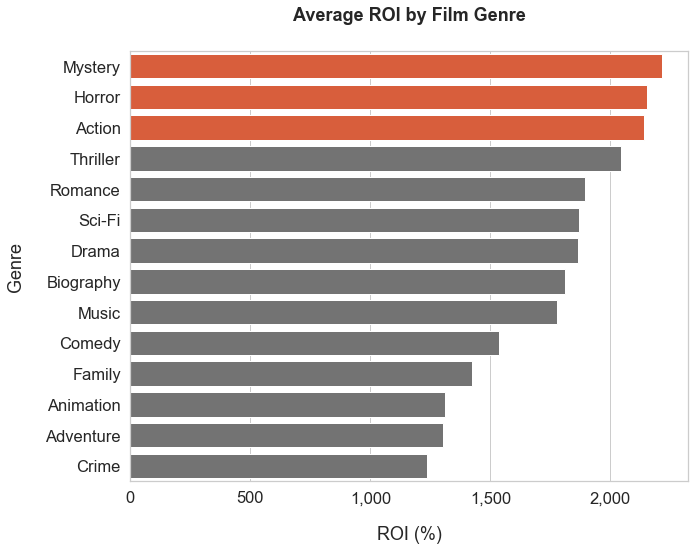

In [136]:
top3_genres = value[:3]

plt.figure(figsize=(10,8))

bar_colors = ['#f25022' if (x in top3_genres) else '#737373' for x in roi.values() ]

ax = sns.barplot(x = list(roi.values()), y = list(roi.keys()), palette=bar_colors)
plt.xlabel("ROI (%)", labelpad=20)
plt.ylabel("Genre", labelpad=20)
plt.title('Average ROI by Film Genre', fontweight='bold', pad=30)

ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100)))

plt.tight_layout()
plt.savefig('ROI_Genre', dpi=300);

## Question 4-1: Which actors bring the most value to a movie?

### Clean data

#### Drop the dead
Microsoft can't hire anyone who is deceased

In [137]:
name_basics_df = name_basics_df[name_basics_df['death_year'].isnull()]
name_basics_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [138]:
name_basics_df.shape

(599865, 5)

In [139]:
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599865 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        599865 non-null  object 
 1   birth_year          76464 non-null   float64
 2   death_year          0 non-null       float64
 3   primary_profession  549317 non-null  object 
 4   known_for_titles    569766 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.5+ MB


### EDA

#### Merge principals & name basics
Links nconst to names of people. Find actors (includes actresses) and directors for top-performing films.

In [140]:
title_principals_df.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [141]:
title_principals_df.shape

(1028186, 5)

In [142]:
name_basics_df.reset_index(inplace=True)
title_principals_df.reset_index(inplace=True)

In [143]:
principal_info_df = pd.merge(title_principals_df, name_basics_df, on='nconst', how='left')
principal_info_df.head(10)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383"
8,tt0323808,5,nm0362736,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN,Peter Snell,1938.0,NaN,"producer,soundtrack,executive","tt0070917,tt2231097,tt0093771,tt0078836"


In [144]:
principal_info_df[principal_info_df.duplicated(keep=False)]

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles


no duplicates

In [145]:
principal_info_df.shape

(1028186, 11)

In [146]:
principal_info_df.isna().sum()

tconst                      0
ordering                    0
nconst                      0
category                    0
job                    850502
characters             634826
primary_name            12117
birth_year             805118
death_year            1028186
primary_profession      64811
known_for_titles        42470
dtype: int64

Lots of missing values in "job." More reliable to look at category to discern role in a specific title

In [147]:
principal_info_df['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [148]:
principal_info_df = principal_info_df.drop(['job', 'death_year', 'known_for_titles', 'ordering'], axis=1)
principal_info_df.head()

,tconst,nconst,category,characters,primary_name,birth_year,primary_profession
0,tt0111414,nm0246005,actor,"[""The Man""]",Tommy Dysart,NaN,actor
1,tt0111414,nm0398271,director,NaN,Frank Howson,1952.0,"actor,writer,producer"
2,tt0111414,nm3739909,producer,NaN,Barry Porter-Robinson,NaN,"producer,art_department"
3,tt0323808,nm0059247,editor,NaN,Sean Barton,1944.0,"editor,editorial_department,assistant_director"
4,tt0323808,nm3579312,actress,"[""Beth Boothby""]",Brittania Nicol,NaN,"actress,soundtrack"


#### Create separate dataframes for actors and directors

In [149]:
actors_info_df = principal_info_df[(principal_info_df['category']=='actor') | (principal_info_df['category']=='actress')]
actors_info_df.reset_index(inplace=True)
actors_info_df.head()

,index,tconst,nconst,category,characters,primary_name,birth_year,primary_profession
0,0,tt0111414,nm0246005,actor,"[""The Man""]",Tommy Dysart,NaN,actor
1,4,tt0323808,nm3579312,actress,"[""Beth Boothby""]",Brittania Nicol,NaN,"actress,soundtrack"
2,5,tt0323808,nm2694680,actor,"[""Steve Thomson""]",Henry Garrett,NaN,actor
3,6,tt0323808,nm0574615,actor,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,"actor,soundtrack,director"
4,7,tt0323808,nm0502652,actress,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,actress


In [150]:
director_info_df = principal_info_df[principal_info_df['category']=='director']
director_info_df.reset_index(inplace=True)
director_info_df.head()

,index,tconst,nconst,category,characters,primary_name,birth_year,primary_profession
0,1,tt0111414,nm0398271,director,NaN,Frank Howson,1952.0,"actor,writer,producer"
1,8,tt0323808,nm0362736,director,NaN,NaN,NaN,NaN
2,18,tt0417610,nm1145057,director,NaN,Alejandro Chomski,1968.0,"director,writer,producer"
3,28,tt0469152,nm0707738,director,NaN,Alyssa R. Bennett,1960.0,"producer,director,actress"
4,35,tt0473032,nm0776090,director,NaN,J. Neil Schulman,1953.0,"actor,writer,soundtrack"


#### Merge movie budgets with title basics

We can match principal info to boxoffice performance using tconst. Must merge the movie budgets to title info first, as the budgets table does not contain a tconst column. This merge was performed in the previous question, but only with the top 100 films from `budgets_adjusted_df`.

In [151]:
budgets_adjusted_df.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit
0,8803,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08
1,9887,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08
2,10025,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08
3,9276,2011-03-11,Mars Needs Moms,2011,1.725875e+08,2.461414e+07,4.550528e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.270822e+08,-1.479733e+08
4,9275,2011-03-11,Mars Needs Moms,2011,1.500000e+08,2.139276e+07,3.954976e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.104502e+08,-1.286072e+08


In [152]:
budgets_adjusted_df.shape

(6410, 13)

In [153]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [154]:
title_basics_df.shape

(146144, 6)

In [155]:
movie_details_df2 = pd.merge(budgets_adjusted_df, title_basics_df, right_on = ['primary_title', 'start_year'],
                           left_on=['movie', 'release_year'], how='left')
movie_details_df2.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,8803,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
1,9887,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,10025,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08,NaN,NaN,NaN,NaN,NaN,NaN
3,9276,2011-03-11,Mars Needs Moms,2011,1.725875e+08,2.461414e+07,4.550528e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.270822e+08,-1.479733e+08,tt1305591,Mars Needs Moms,Mars Needs Moms,2011.0,88.0,"Adventure,Animation,Family"
4,9275,2011-03-11,Mars Needs Moms,2011,1.500000e+08,2.139276e+07,3.954976e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.104502e+08,-1.286072e+08,tt1305591,Mars Needs Moms,Mars Needs Moms,2011.0,88.0,"Adventure,Animation,Family"


In [156]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492 entries, 0 to 6491
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   level_0          6492 non-null   int64         
 1   release_date     6492 non-null   datetime64[ns]
 2   movie            6492 non-null   object        
 3   release_year     6492 non-null   int64         
 4   budget           6492 non-null   float64       
 5   domestic_gross   6492 non-null   float64       
 6   worldwide_gross  6492 non-null   float64       
 7   roi              6492 non-null   float64       
 8   domestic_roi     6492 non-null   float64       
 9   budget_range     6492 non-null   category      
 10  budget_class     6492 non-null   category      
 11  profit           6492 non-null   float64       
 12  domestic_profit  6492 non-null   float64       
 13  tconst           2350 non-null   object        
 14  primary_title    2350 non-null   object 

In [157]:
movie_details_df2 = movie_details_df2.drop(['primary_title', 'original_title',
                                            'start_year', 'genres'], axis=1)

In [158]:
movie_details_df2[movie_details_df2.duplicated(keep=False)].sort_values(by='movie')

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit,tconst,runtime_minutes


#### Merge actor info to budget/profit info

In [159]:
actors_info_df.head()

,index,tconst,nconst,category,characters,primary_name,birth_year,primary_profession
0,0,tt0111414,nm0246005,actor,"[""The Man""]",Tommy Dysart,NaN,actor
1,4,tt0323808,nm3579312,actress,"[""Beth Boothby""]",Brittania Nicol,NaN,"actress,soundtrack"
2,5,tt0323808,nm2694680,actor,"[""Steve Thomson""]",Henry Garrett,NaN,actor
3,6,tt0323808,nm0574615,actor,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,"actor,soundtrack,director"
4,7,tt0323808,nm0502652,actress,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,actress


In [160]:
actors_info_df.shape

(402926, 8)

In [161]:
actors_budgets_df = pd.merge(actors_info_df, movie_details_df2, on='tconst', how='left')
actors_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407448 entries, 0 to 407447
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               407448 non-null  int64         
 1   tconst              407448 non-null  object        
 2   nconst              407448 non-null  object        
 3   category            407448 non-null  object        
 4   characters          329524 non-null  object        
 5   primary_name        403601 non-null  object        
 6   birth_year          128614 non-null  float64       
 7   primary_profession  385706 non-null  object        
 8   level_0             9264 non-null    float64       
 9   release_date        9264 non-null    datetime64[ns]
 10  movie               9264 non-null    object        
 11  release_year        9264 non-null    float64       
 12  budget              9264 non-null    float64       
 13  domestic_gross      9264 non-

#### Filter for actors who have appeared in more than 5 films

In [162]:
# Finding cutoff through trial and error
actors_budgets_df['primary_name'].value_counts().head(8650)

Eric Roberts            147
Brahmanandam            126
Prakash Raj              79
Tom Sizemore             71
Mihir Das                71
                       ... 
David Denman              6
Eva Josefíková            5
Eric Warrington           5
Iain De Caestecker        5
Andrius Bialobzeskis      5
Name: primary_name, Length: 8650, dtype: int64

In [163]:
#Filter for actors that have appeared in more than 5 films
actor_list = actors_budgets_df['primary_name'].value_counts().index[:8646].tolist()

In [164]:
mask = actors_budgets_df['primary_name'].isin(actor_list)

In [165]:
actors_filtered_df = actors_budgets_df[mask]

#### Filter for top genre

In [166]:
top_genres = ['Mystery']

In [167]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [168]:
subset = title_basics_df[['tconst', 'genres']]
subset = subset.dropna(axis=0, subset=['genres'])

In [169]:
mask = subset['genres'].str.contains('|'.join(top_genres))
title_genres = subset[mask]

In [170]:
actors_filtered_genres = pd.merge(actors_filtered_df, title_genres, on='tconst', 
                                  how='inner')

In [171]:
actors_filtered_genres

,index,tconst,nconst,category,characters,primary_name,birth_year,primary_profession,level_0,release_date,...,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit,runtime_minutes,genres
0,48,tt0477302,nm0000158,actor,"[""Thomas Schell""]",Tom Hanks,1956.0,"producer,actor,soundtrack",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adventure,Drama,Mystery"
1,49,tt0477302,nm0000113,actress,"[""Linda Schell""]",Sandra Bullock,1964.0,"producer,actress,soundtrack",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adventure,Drama,Mystery"
2,50,tt0477302,nm0001884,actor,"[""The Renter""]",Max von Sydow,1929.0,"actor,soundtrack,director",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adventure,Drama,Mystery"
3,726,tt1078591,nm0523344,actress,"[""Raeanne""]",Lynn Lowry,1947.0,"actress,writer,producer",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Comedy,Drama,Mystery"
4,727,tt1078591,nm1594672,actor,"[""Sage""]",Peter Stickles,1976.0,"actor,miscellaneous,producer",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Comedy,Drama,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1025705,tt7172308,nm1795232,actor,"[""Kuldip Patwal""]",Deepak Dobriyal,NaN,actor,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Crime,Drama,Mystery"
4451,1025706,tt7172308,nm3761132,actor,"[""Lawyer Parduman Shahpuri""]",Gulshan Devaiah,NaN,actor,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Crime,Drama,Mystery"
4452,1025707,tt7172308,nm0784025,actress,"[""Simrat Chadha""]",Raima Sen,1979.0,actress,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Crime,Drama,Mystery"
4453,1025708,tt7172308,nm0196375,actor,"[""CM Varun Chadha""]",Parvin Dabas,1974.0,"actor,director,writer",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Crime,Drama,Mystery"


### Visualization

In [172]:
actors_grouped = actors_filtered_df.groupby('primary_name').mean()
actors_grouped = actors_grouped.sort_values(by='roi', ascending=False)
actors_grouped.reset_index(inplace=True)

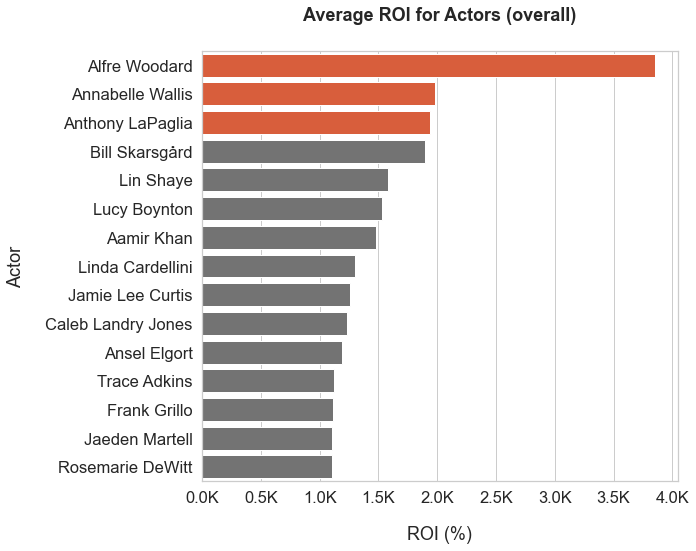

In [173]:
labels = list(actors_grouped['primary_name'][:15])
values = list(actors_grouped['roi'][:15])
top3_values = values[:3]

clrs = ['#f25022' if (x in top3_values) else '#737373' for x in values]

plt.figure(figsize=(10,8))
ax = sns.barplot(x=values, y=labels, palette=clrs)
plt.title('Average ROI for Actors (overall)',
          fontweight='bold', pad=30)
plt.xlabel('ROI (%)', labelpad=20)
plt.ylabel('Actor', labelpad=20)

ax.xaxis.get_major_formatter().set_scientific(False)
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10) + 'K'))
plt.tight_layout()
plt.savefig('ROI_Actor', dpi=300);

In [174]:
actors_genres_grouped = actors_filtered_genres.groupby('primary_name').mean()
actors_genres_grouped = actors_genres_grouped.sort_values(by='roi', ascending=False)
actors_genres_grouped.reset_index(inplace=True)

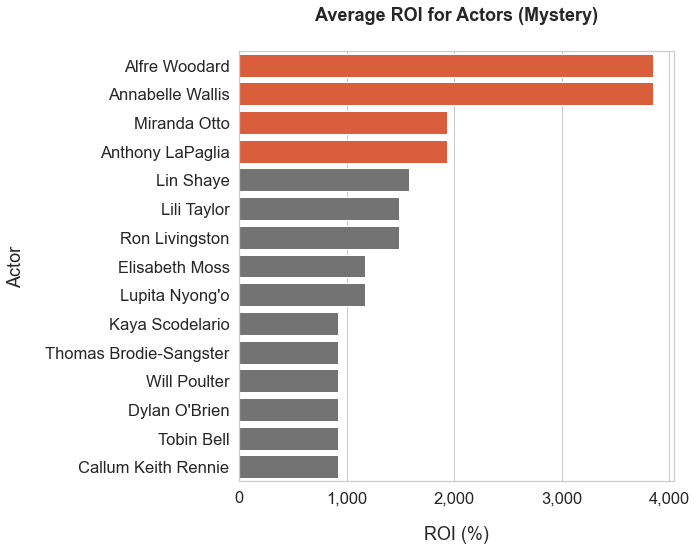

In [175]:
labels = list(actors_genres_grouped['primary_name'][:15])
values = list(actors_genres_grouped['roi'][:15])
top3_values = values[:3]

clrs = ['#f25022' if (x in top3_values) else '#737373' for x in values]

plt.figure(figsize=(10,8))
ax = sns.barplot(x=values, y=labels, palette=clrs)
plt.title('Average ROI for Actors (Mystery)',
          fontweight='bold', pad=30)
plt.xlabel('ROI (%)', labelpad=20)
plt.ylabel('Actor', labelpad=20)

ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100)))

plt.tight_layout()
plt.savefig('ROI_Actor_Genre', dpi=300);

## Question 4-2: Which directors bring the most value to a movie?

#### Merge director info to budget/profit info

In [176]:
director_info_df.head()

,index,tconst,nconst,category,characters,primary_name,birth_year,primary_profession
0,1,tt0111414,nm0398271,director,NaN,Frank Howson,1952.0,"actor,writer,producer"
1,8,tt0323808,nm0362736,director,NaN,NaN,NaN,NaN
2,18,tt0417610,nm1145057,director,NaN,Alejandro Chomski,1968.0,"director,writer,producer"
3,28,tt0469152,nm0707738,director,NaN,Alyssa R. Bennett,1960.0,"producer,director,actress"
4,35,tt0473032,nm0776090,director,NaN,J. Neil Schulman,1953.0,"actor,writer,soundtrack"


In [177]:
director_info_df.shape

(146393, 8)

In [178]:
movie_details_df2.head()

,level_0,release_date,movie,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,budget_range,budget_class,profit,domestic_profit,tconst,runtime_minutes
0,8803,2019-06-07,Dark Phoenix,2019,3.500000e+08,4.276235e+07,1.497624e+08,-0.572108,-0.877822,"(48389193.0, 512707249.0]",High,-2.002376e+08,-3.072376e+08,tt6565702,113.0
1,9887,2001-04-27,Town & Country,2001,1.534453e+08,9.809464e+06,1.514690e+07,-0.901288,-0.936072,"(48389193.0, 512707249.0]",High,-1.382984e+08,-1.436358e+08,NaN,NaN
2,10025,2002-08-16,The Adventures of Pluto Nash,2002,1.438638e+08,6.345980e+06,1.020713e+07,-0.929050,-0.955889,"(48389193.0, 512707249.0]",High,-1.336567e+08,-1.375178e+08,NaN,NaN
3,9276,2011-03-11,Mars Needs Moms,2011,1.725875e+08,2.461414e+07,4.550528e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.270822e+08,-1.479733e+08,tt1305591,88.0
4,9275,2011-03-11,Mars Needs Moms,2011,1.500000e+08,2.139276e+07,3.954976e+07,-0.736335,-0.857382,"(48389193.0, 512707249.0]",High,-1.104502e+08,-1.286072e+08,tt1305591,88.0


In [179]:
movie_details_df2.shape

(6492, 15)

In [180]:
director_budgets_df = pd.merge(director_info_df, movie_details_df2, on='tconst', how='left')
director_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147605 entries, 0 to 147604
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               147605 non-null  int64         
 1   tconst              147605 non-null  object        
 2   nconst              147605 non-null  object        
 3   category            147605 non-null  object        
 4   characters          0 non-null       object        
 5   primary_name        146744 non-null  object        
 6   birth_year          29903 non-null   float64       
 7   primary_profession  146157 non-null  object        
 8   level_0             2482 non-null    float64       
 9   release_date        2482 non-null    datetime64[ns]
 10  movie               2482 non-null    object        
 11  release_year        2482 non-null    float64       
 12  budget              2482 non-null    float64       
 13  domestic_gross      2482 non-

#### Filter for directors who have directed more than 5 films

In [181]:
director_budgets_df['primary_name'].value_counts().head(1675)

Rajiv Chilaka              49
Stephan Düfel              48
Graeme Duane               45
Claudio Costa              42
Nayato Fio Nuala           41
                           ..
Takayuki Shibasaki          6
Dennis Bots                 6
Tamae Garateguy             6
Renee S. Warren Peoples     6
Humberto Rosa               5
Name: primary_name, Length: 1675, dtype: int64

In [182]:
#Filter for directors who have directed more than 5 films
director_list = director_budgets_df['primary_name'].value_counts().index[:1674].tolist()

In [183]:
mask = director_budgets_df['primary_name'].isin(director_list)
director_filtered_df = director_budgets_df[mask]

In [184]:
directors_grouped = director_filtered_df.groupby('primary_name').mean()
directors_grouped = directors_grouped.sort_values(by='roi', ascending=False)
directors_grouped.head()

,index,birth_year,level_0,release_year,budget,domestic_gross,worldwide_gross,roi,domestic_roi,profit,domestic_profit,runtime_minutes
primary_name,,,,,,,,,,,,
John R. Leonetti,574505.500000,1956.0,2713.0,2015.500000,9.569090e+06,5.145194e+07,1.464859e+08,19.736909,6.078497,1.369168e+08,4.188285e+07,94.500000
Kyle Balda,369057.333333,1971.0,484.0,2016.000000,7.724837e+07,3.117551e+08,1.138654e+09,13.738294,3.034742,1.061406e+09,2.345067e+08,90.000000
James DeMonaco,453180.666667,1969.0,613.0,2015.000000,9.905676e+06,7.851895e+07,1.199462e+08,11.122119,6.927819,1.100406e+08,6.861327e+07,105.500000
Pierre Coffin,204932.000000,1967.0,743.5,2013.333333,7.758665e+07,3.118408e+08,8.957363e+08,10.501490,3.005473,8.181497e+08,2.342541e+08,94.000000
James Wan,369982.400000,1977.0,944.5,2015.333333,1.274332e+08,2.848210e+08,1.029560e+09,9.353792,2.607358,9.021273e+08,1.573878e+08,130.666667


#### Filter for top genre

In [185]:
directors_filtered_genres = pd.merge(director_filtered_df, title_genres, on='tconst', 
                                     how='inner')

### Visualization

In [186]:
directors_grouped.reset_index(inplace=True)

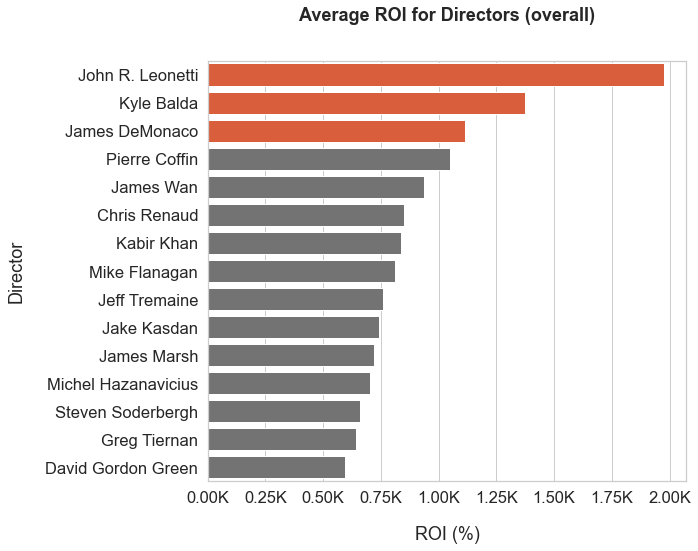

In [187]:
labels = list(directors_grouped['primary_name'][:15])
values = list(directors_grouped['roi'][:15])
top3_values = values[:3]

clrs = ['#f25022' if (x in top3_values) else '#737373' for x in values]

plt.figure(figsize=(10,8))
ax = sns.barplot(x=values, y=labels, palette=clrs)
plt.title('Average ROI for Directors (overall)', 
          fontweight='bold', pad=40);
plt.xlabel('ROI (%)', labelpad=20)
plt.ylabel('Director', labelpad=20)

ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/10) + 'K'))

plt.tight_layout()
plt.savefig('ROI_Director', dpi=300);

In [188]:
directors_genres_grouped = directors_filtered_genres.groupby('primary_name').mean()
directors_genres_grouped = directors_genres_grouped.sort_values(by='roi', ascending=False)
directors_genres_grouped.reset_index(inplace=True)

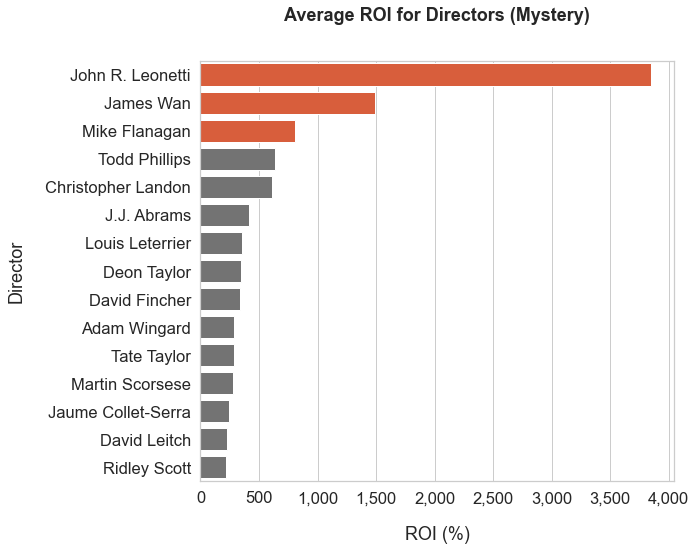

In [189]:
labels = list(directors_genres_grouped['primary_name'][:15])
values = list(directors_genres_grouped['roi'][:15])
top3_values = values[:3]

clrs = ['#f25022' if (x in top3_values) else '#737373' for x in values]

plt.figure(figsize=(10,8))
ax = sns.barplot(x=values, y=labels, palette=clrs)
plt.title('Average ROI for Directors (Mystery)', 
          fontweight='bold', pad=40);
plt.xlabel('ROI (%)', labelpad=20)
plt.ylabel('Director', labelpad=20)

ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100)))

plt.tight_layout()
plt.savefig('ROI_Director_Genre', dpi=300);